In [14]:
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
data = pd.read_csv('./archive/male_players.csv')
# list(data.columns)
# print(data.head)

C:\Users\flavi\AppData\Local\Temp\ipykernel_11616\1852648250.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./archive/male_players.csv')


In [ ]:
def get_players_by_country(country, fifa_version_min=24):
    players_by_country = data[(data['nationality_name'] == country) & (data['fifa_version'] >= fifa_version_min)]
    top_players = players_by_country.nlargest(10, 'overall')
    return top_players[['short_name', 'overall', 'potential', 'player_positions']]

print(get_players_by_country('France'))


In [ ]:
def get_players_by_team(x, fifa_version_min=24):
    players = data[(data['club_name'] == x) & (data['fifa_version'] >= fifa_version_min)][['short_name','age','value_eur','club_jersey_number','club_position','nationality_name','overall','club_contract_valid_until_year']]
    players['value_eur'] = players['value_eur'].apply(lambda x: f"{x:,.0f} €")
    return players

get_players_by_team('Real Madrid')

In [ ]:
def get_high_potential_players(threshold=5):
    players_with_potential = data[(data['fifa_version'] >= 24) & (data['potential'] - data['overall'] >= threshold) & (data['overall'] > 65) & (data['potential'] > 80) & (data['age'] < 21)]
    players_with_potential['value_eur'] = players_with_potential['value_eur'].apply(lambda x: f"{x:,.0f} €")
    top_players = players_with_potential.nlargest(40, 'potential')
    return top_players[['short_name', 'overall', 'potential', 'player_positions', 'age', 'value_eur', 'club_contract_valid_until_year']]

get_high_potential_players()


In [ ]:
def list_all_positions():
    all_positions = data['player_positions'].str.split(', ', expand=True).stack().unique()
    return sorted(all_positions)

def get_players_by_position(pos):
    players = data[(data['fifa_version'] >= 24) & (data['player_positions'] == pos)]
    return players[['short_name', 'overall', 'potential', 'player_positions']]

print(list_all_positions())
pos = input('Select player position:\n')
get_players_by_position(pos)

In [ ]:
def get_best_players(position, fifa_version_min=24, top_n=10):
    valid_positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST']
    if position not in valid_positions:
        raise ValueError(f"Invalid position: {position}. Valid positions are {valid_positions}")
    players = data[(data['fifa_version'] >= fifa_version_min) & (data['player_positions'].str.contains(position))]
    players['value_eur'] = players['value_eur'].apply(lambda x: f"{x:,.0f} €")
    top_players = players.nlargest(top_n, 'overall')
    return top_players[['short_name', 'overall', 'potential', 'player_positions', 'value_eur']]

print(get_best_players('ST')) 


C:\Users\flavi\AppData\Local\Temp\ipykernel_11616\755776547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='player_positions', data=data_filtered, palette='dark', order=valid_positions)


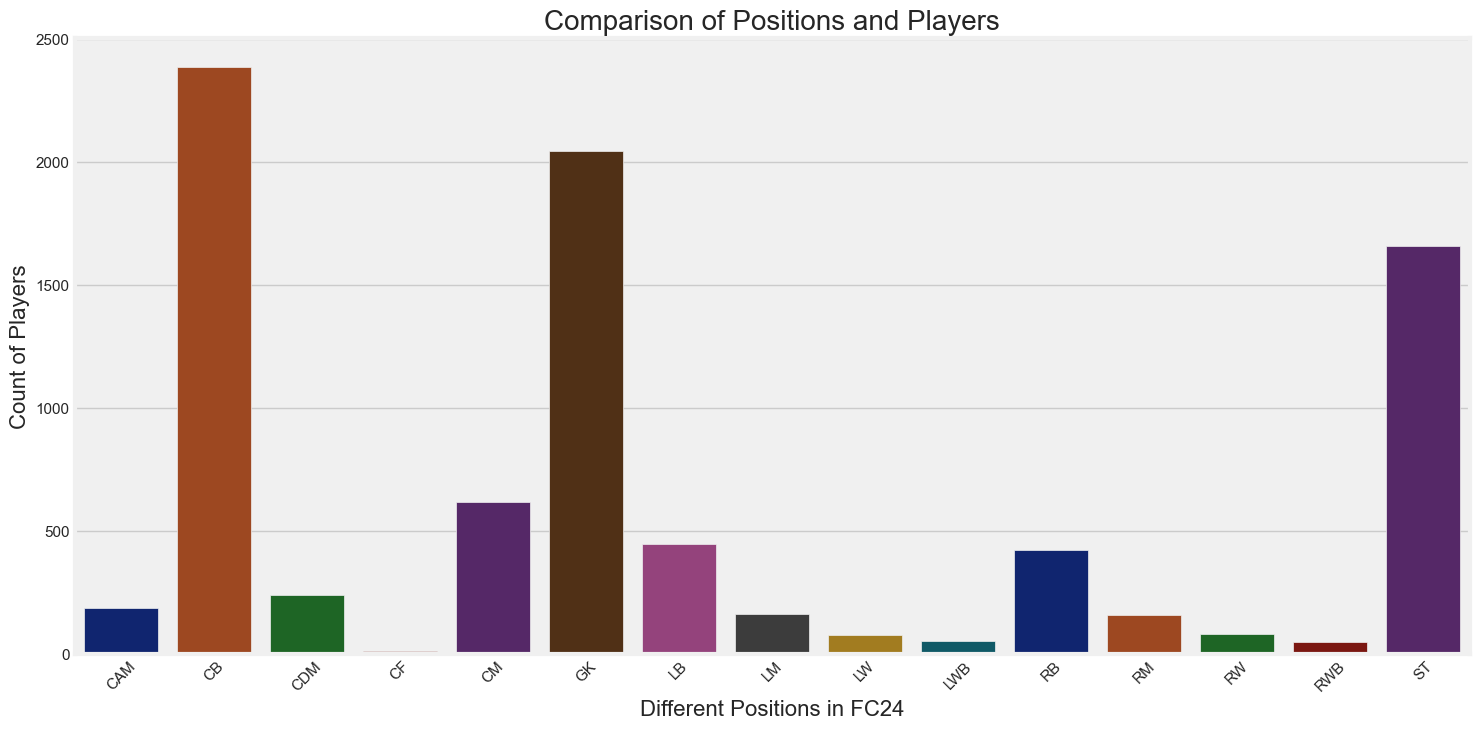

In [16]:
valid_positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST']
data_by_fc_24 = data[data['fifa_version'] >= 24]
data_filtered = data_by_fc_24[data_by_fc_24['player_positions'].str.contains('|'.join(valid_positions))]

plt.figure(figsize=(18,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='player_positions', data=data_filtered, palette='dark', order=valid_positions) 
ax.set_xlabel('Different Positions in FC24', fontsize=16)
ax.set_ylabel('Count of Players', fontsize=16)
ax.set_title('Comparison of Positions and Players', fontsize=20)
plt.xticks(rotation=45)
plt.show()


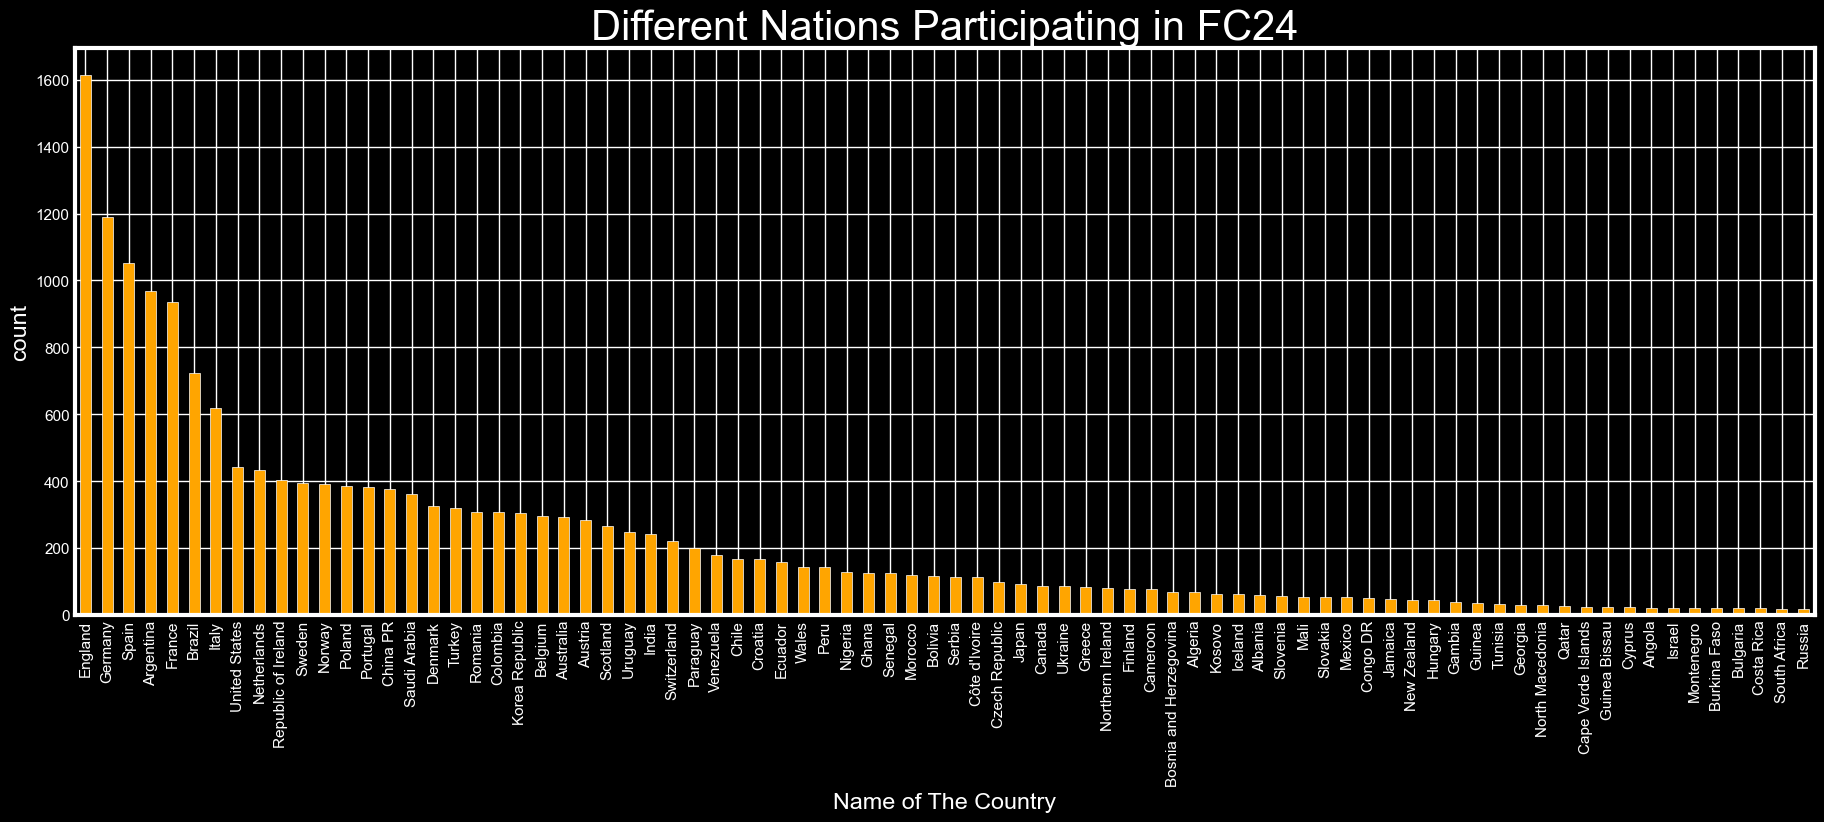

In [17]:
data_by_fc_24 = data[data['fifa_version'] >= 24]

plt.style.use('dark_background')
data_by_fc_24['nationality_name'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FC24', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

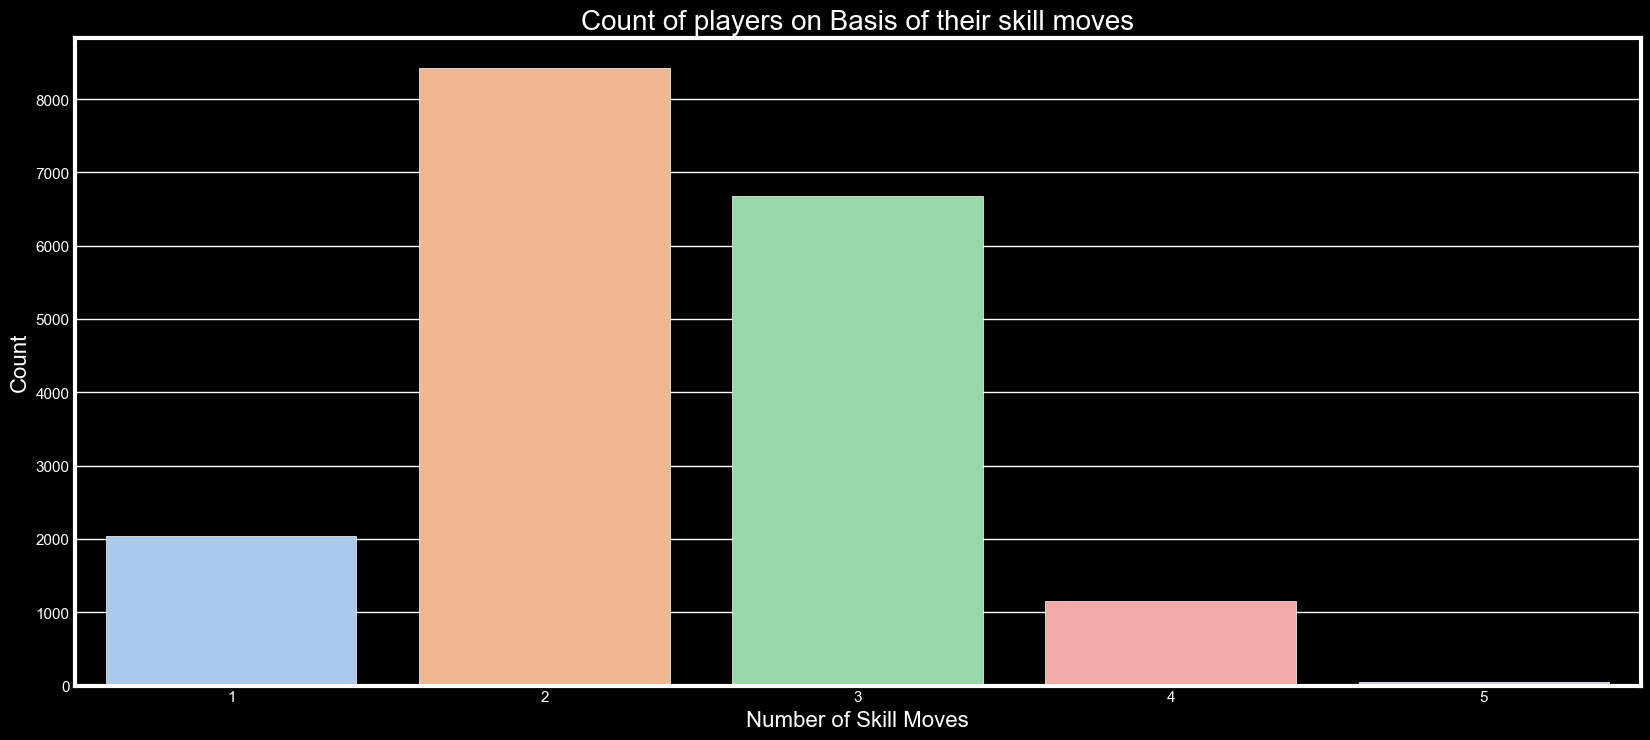

In [18]:
data_by_fc_24 = data[data['fifa_version'] >= 24]

plt.figure(figsize=(18,8))
ax = sns.countplot(x='skill_moves', data=data_by_fc_24, hue='skill_moves', palette='pastel', legend=False)
ax.set_title('Count of players on Basis of their skill moves', fontsize=20)
ax.set_xlabel('Number of Skill Moves', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

plt.show()

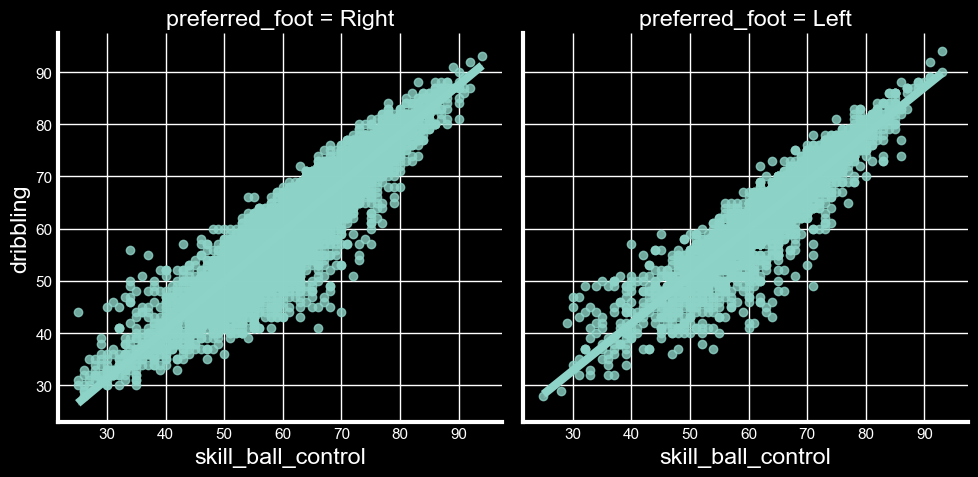

In [19]:
data_by_fc_24 = data[data['fifa_version'] >= 24]

sns.lmplot(x = 'skill_ball_control', y = 'dribbling', data = data_by_fc_24, col = 'preferred_foot')
plt.show()